In [111]:
import numpy as np
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Input,concatenate,Permute,GlobalMaxPool1D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model


In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [95]:
x_train=x_train/255
x_test=x_test/255

In [96]:
inputs= Input(shape=(28,28))
x1=inputs
x = inputs
x = Bidirectional(LSTM(10,return_sequences=True))(x)
x=GlobalMaxPool1D()(x)
x1=Permute((2,1),input_shape=(28,28))(x1)
x1=Bidirectional(LSTM(10,return_sequences=True))(x1)
x1=GlobalMaxPool1D()(x1)
x2=concatenate([x,x1])
x2=Dense(10,activation='softmax')(x2)
model=Model(inputs,x2)


In [97]:
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
permute_17 (Permute)            (None, 28, 28)       0           input_23[0][0]                   
__________________________________________________________________________________________________
bidirectional_30 (Bidirectional (None, 28, 20)       3120        input_23[0][0]                   
__________________________________________________________________________________________________
bidirectional_31 (Bidirectional (None, 28, 20)       3120        permute_17[0][0]                 
___________________________________________________________________________________________

In [98]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [99]:
model.fit(x_train,y_train,batch_size=32,epochs=3,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.6566 - accuracy: 0.8340 - val_loss: 0.2737 - val_accuracy: 0.9237
Epoch 2/3
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.2171 - accuracy: 0.9387 - val_loss: 0.1704 - val_accuracy: 0.9524
Epoch 3/3
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.1590 - accuracy: 0.9538 - val_loss: 0.1354 - val_accuracy: 0.9598


In [103]:
pred=np.argmax(model.predict(np.reshape(x_test[5],(-1,28,28))))

In [105]:
pred

1

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

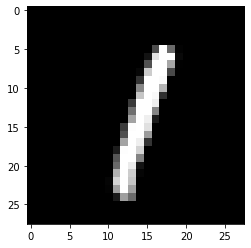

In [109]:
plt.imshow(x_test[5],cmap='gray')

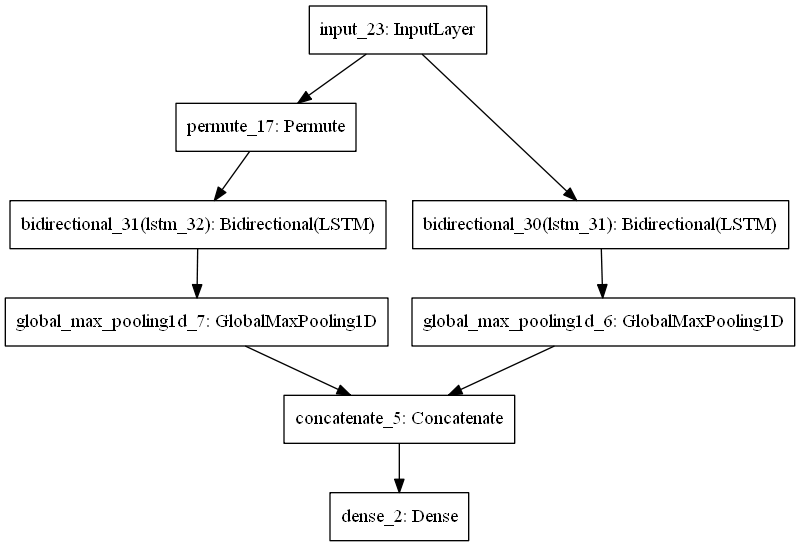

In [112]:
plot_model(model)